# This is an exploratory data analysis on Haberman Cancer Survival dataset from Kaggle : Submitted by Nairhita Samanta Assignment # 1

A study was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital. The study was on the survival of patients who had undergone surgery for breast cancer. This is the dataset from that study. 

In [7]:
import warnings
warnings.filterwarnings("ignore") 

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

haber = pd.read_csv("haberman.csv")

#haber

In [9]:
print (haber.shape)
print (haber.columns)


(306, 4)
Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [10]:
haber["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

The dataset reports 306 cases with 4 attributes for each of them, namely, year of operation, age of the patient at the time of operation, number of positive axillary nodes detected and two general consequences of the surgery, status 1 where the patient survived and status 2 where the patient did not make it. Among the 306 patients, 225 patient survived 5 years or longer and 81 patients didnot.

Our objective is to investigate whether the attributes reported in the dataset can determine the consequence of the surgery.

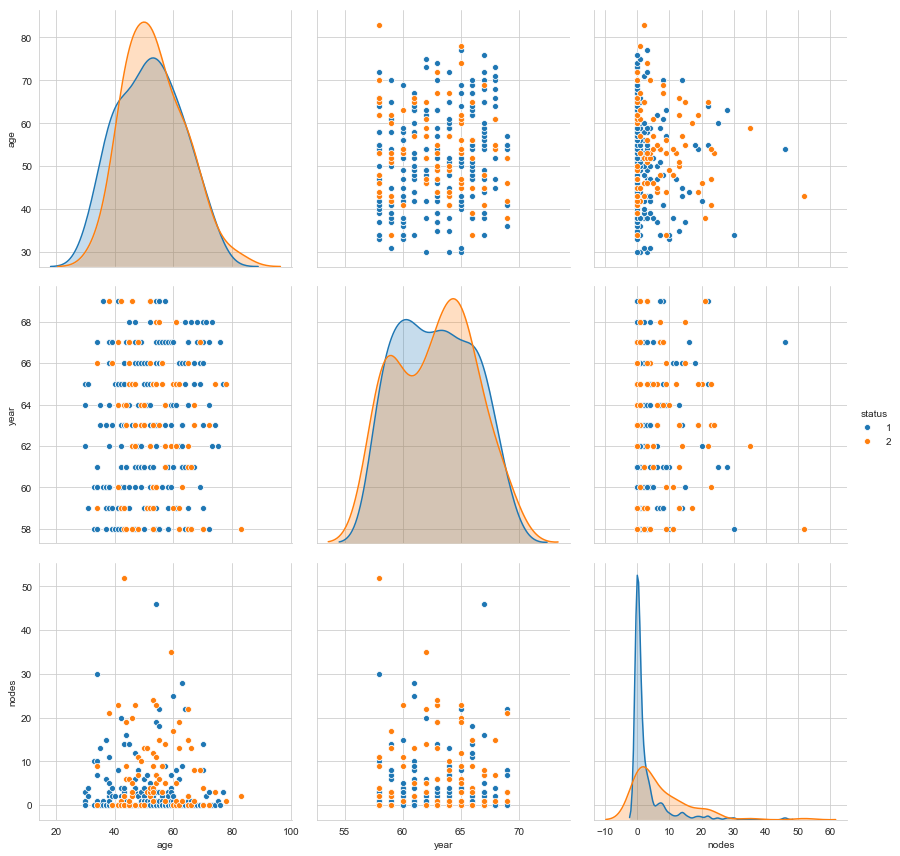

In [15]:
#pairplots 

plt.close();
sns.set_style("whitegrid");
sns.pairplot(haber, vars=["age", "year", "nodes"], hue="status", size=4);
plt.show()


From the Bi-variate analysis it is difficult to conclude which of the factors determines the status of the surgery. One thing is clear the year of the surgery doesnot determine the status. Status 2 can be a consequence of the higher number of nodes or greater age.

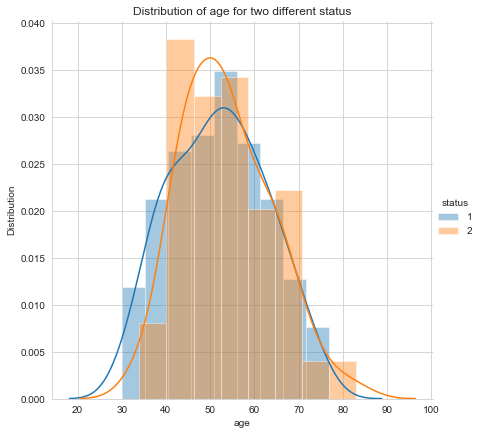

In [48]:
#Distribution of age for two different status
sns.FacetGrid(haber, hue="status", size=6) \
   .map(sns.distplot, "age") \
   .add_legend();
plt.ylabel("Distribution")
plt.title("Distribution of age for two different status")
plt.show();

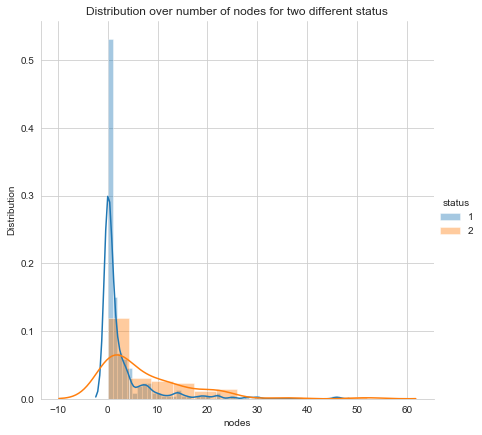

In [51]:
#Distribution of nodes for two different status
sns.FacetGrid(haber, hue="status", size=6) \
   .map(sns.distplot, "nodes") \
   .add_legend();
plt.ylabel("Distribution")
plt.title("Distribution over number of nodes for two different status")
plt.show();

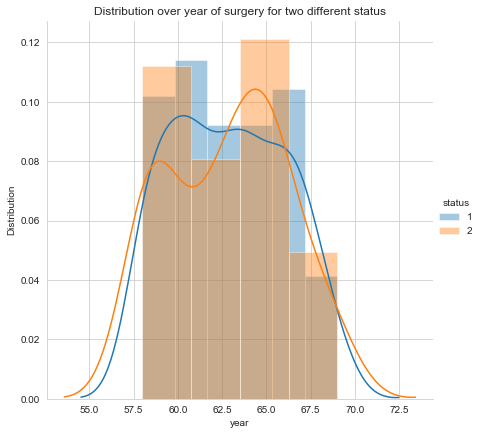

In [50]:
#Distribution of year for two different status
sns.FacetGrid(haber, hue="status", size=6) \
.map(sns.distplot, "year") \
   .add_legend();
plt.ylabel("Distribution")
plt.title("Distribution over year of surgery for two different status")
plt.show();

The probability distribution of three features clearly shows that from Year of surgery it is not possible to determine the status as both the distribution of satus 1 and status 2 fall onto each other. Infact the age of the patient is not proved to be very helful either. We can say that if the age of the patient is greater than 90, its more prone to status 2. On the other hand if the number of nodes are higher than 5, the probability of status 2 is higher than status 1.

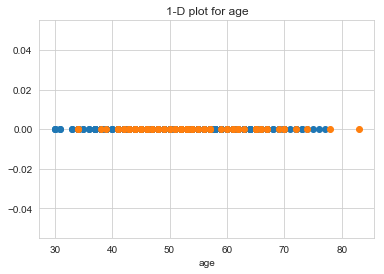

In [20]:
# 1-D scatter plot of age

haber_1 = haber.loc[haber["status"] == 1];
haber_2 = haber.loc[haber["status"] == 2];


plt.plot(haber_1["age"], np.zeros_like(haber_1['age']), 'o')
plt.plot(haber_2["age"], np.zeros_like(haber_2['age']), 'o')
plt.title("1-D plot for age")
plt.xlabel("age")
plt.show()

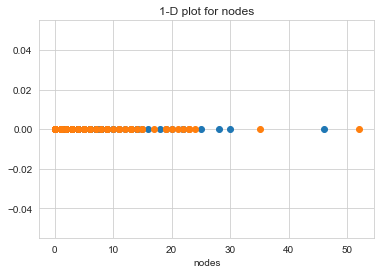

In [21]:
# 1-D scatter plot of nodes
plt.plot(haber_1["nodes"], np.zeros_like(haber_1['nodes']), 'o')
plt.plot(haber_2["nodes"], np.zeros_like(haber_2['nodes']), 'o')
plt.title("1-D plot for nodes")
plt.xlabel("nodes")
plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


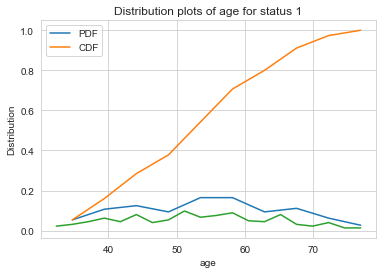

In [36]:
#Cumulative Distribution Function (CDF) of age for status 1
counts, bin_edges = np.histogram(haber_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF");
plt.plot(bin_edges[1:],cdf, label= "CDF")


counts, bin_edges = np.histogram(haber_1['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("Distribution plots of age for status 1")
plt.ylabel("Distribution")
plt.xlabel("age")
plt.legend()
plt.show();

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


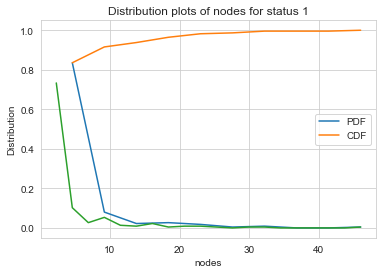

In [40]:
#Cumulative Distribution Function (CDF) of nodes for status 1
counts, bin_edges = np.histogram(haber_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF");
plt.plot(bin_edges[1:], cdf, label= "CDF")


counts, bin_edges = np.histogram(haber_1['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("Distribution plots of nodes for status 1")
plt.ylabel("Distribution")
plt.xlabel("nodes")
plt.legend()
plt.show();

[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


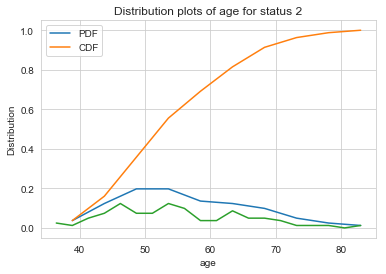

In [38]:
#Cumulative Distribution Function (CDF) of age for status 2
counts, bin_edges = np.histogram(haber_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF");
plt.plot(bin_edges[1:], cdf, label="CDF")


counts, bin_edges = np.histogram(haber_2['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("Distribution plots of age for status 2")
plt.legend()
plt.xlabel("age")
plt.ylabel("Distribution")
plt.show();

[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


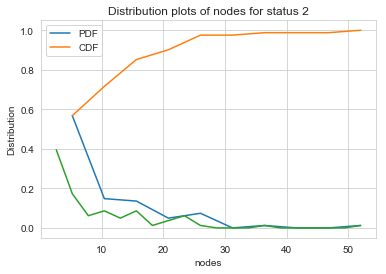

In [39]:
#Cumulative Distribution Function (CDF) of nodes for status 2
counts, bin_edges = np.histogram(haber_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges);
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf, label="PDF");
plt.plot(bin_edges[1:], cdf, label="CDF")


counts, bin_edges = np.histogram(haber_2['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf);
plt.title("Distribution plots of nodes for status 2")
plt.xlabel("nodes")
plt.legend()
plt.ylabel("Distribution")
plt.show();

In [27]:
print("Means of age for status 1 and 2:")
print(np.mean(haber_1["age"]))
print(np.mean(haber_2["age"]))

print("Means of nodes for status 1 and 2:")
print(np.mean(haber_1["nodes"]))
print(np.mean(haber_2["nodes"]))

print("\nStd-dev of age of status 1 and 2:");
print(np.std(haber_1["age"]))
print(np.std(haber_1["age"]))

print("\nStd-dev of nodes of status 1 and 2:");
print(np.std(haber_1["nodes"]))
print(np.std(haber_1["nodes"]))

Means of age for status 1 and 2:
52.01777777777778
53.67901234567901
Means of nodes for status 1 and 2:
2.7911111111111113
7.45679012345679

Std-dev of age of status 1 and 2:
10.98765547510051
10.98765547510051

Std-dev of nodes of status 1 and 2:
5.857258449412131
5.857258449412131


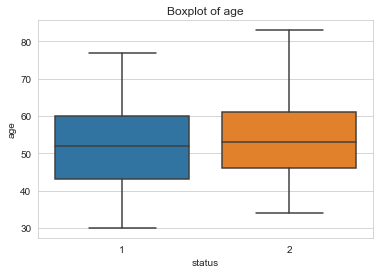

In [44]:
#boxplot of age
sns.boxplot(x='status',y='age', data=haber)
plt.title("Boxplot of age")
plt.show()

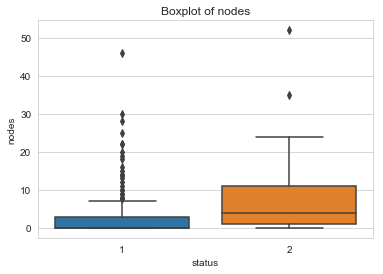

In [45]:
#boxplot of nodes
sns.boxplot(x='status',y='nodes', data=haber)
plt.title("Boxplot of nodes")
plt.show()

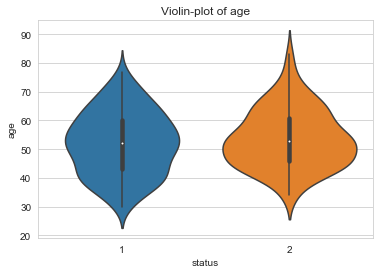

In [46]:
#violinplot of age
sns.violinplot(x="status", y="age", data=haber, size=8)
plt.title("Violin-plot of age")
plt.show()

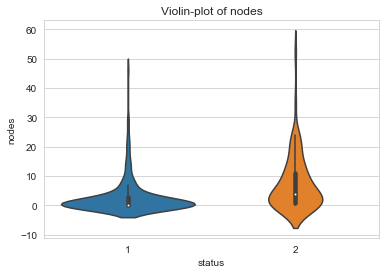

In [47]:
#violinplot of nodes
sns.violinplot(x="status", y="nodes", data=haber, size=8)
plt.title("Violin-plot of nodes")
plt.show()

With the given dataset after performing all the analysis, it can be said that, age and year of operation do not determine the fate of the surgery. It is mostly affected by the number of nodes. If the number of nodes are higher than 4/5, the probability that the patient would survive the surgery is low.